In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import cv2
from  matplotlib.colors import LinearSegmentedColormap
from scipy.signal import butter, lfilter, iirnotch, filtfilt, resample, find_peaks
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from scipy.io import savemat
from src.xray import *
from src.tdt_support import *
from src.filters import *
from src.neural_analysis import *
from src.cort_processing import *
from src.wiener_filter import *

In [3]:
tdt1 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/tdt/t0-030322-15-220303-161731'
kin1 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/angles/_t0-030322-15_2022-03-03_200f-11e100g1.csv'
toe1 = '/home/diya/Documents/rat-fes/data/DLC_anipose_models/anipose_t_march/session/pose-3d/_t0-030322-15_2022-03-03_200f-11e100g1.csv'
np_ts1 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/vids/TIMESTAMPS_cam1_t0-030322-15_2022-03-03_200f-11e100g1.npy'
crop1 = (5,180)

tdt2 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/tdt/t0-030322-15-2-220303-162513'
kin2 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/angles/_t0-030322-15-2_2022-03-03_200f-11e100g1.csv'
toe2 = '/home/diya/Documents/rat-fes/data/DLC_anipose_models/anipose_t_march/session/pose-3d/_t0-030322-15-2_2022-03-03_200f-11e100g1.csv'
np_ts2 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/vids/TIMESTAMPS_cam1_t0-030322-15-2_2022-03-03_200f-11e100g1.npy'
crop2 = (31,227)

tdt3 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/tdt/t0-030322-15-3-220303-163055'
kin3 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/angles/_t0-030322-15-3_2022-03-03_200f-11e100g1.csv'
toe3 = '/home/diya/Documents/rat-fes/data/DLC_anipose_models/anipose_t_march/session/pose-3d/_t0-030322-15-3_2022-03-03_200f-11e100g1.csv'
np_ts3 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/vids/TIMESTAMPS_cam1_t0-030322-15-3_2022-03-03_200f-11e100g1.npy'
crop3 = (5,200)

tdt4 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/tdt/t0-030322-15-4-220303-163556'
kin4 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/angles/_t0-030322-15-4_2022-03-03_200f-11e100g1.csv'
toe4 = '/home/diya/Documents/rat-fes/data/DLC_anipose_models/anipose_t_march/session/pose-3d/_t0-030322-15-4_2022-03-03_200f-11e100g1.csv'
np_ts4 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/vids/TIMESTAMPS_cam1_t0-030322-15-4_2022-03-03_200f-11e100g1.npy'
crop4 = (5,150)

In [4]:
rates1, angles1= process_neural_kinangles(tdt1, kin1, np_ts1, 3.0, crop1, binsize=0.05, toe_height_path = toe1)
rates2, angles2= process_neural_kinangles(tdt2, kin2, np_ts2, 3.0, crop2, binsize=0.05, toe_height_path = toe2)
rates3, angles3= process_neural_kinangles(tdt3, kin3, np_ts3, 3.0, crop3, binsize=0.05, toe_height_path = toe3)
rates4, angles4= process_neural_kinangles(tdt4, kin4, np_ts4, 3.0, crop4, binsize=0.05, toe_height_path = toe4)

#test_rates5, test_angles5 = process_neural_kinangles(tdt4, kin4, np_ts4, 3.0, test_crop, binsize=0.05)

rates_list = []
angles_list = []

rates_list.extend((rates1, rates2, rates3, rates4))
angles_list.extend((angles1, angles2, angles3, angles4))

read from t=0s to t=209.21s
read from t=0s to t=242.15s
read from t=0s to t=206.37s
read from t=0s to t=157.26s


In [6]:
proc_rates_list = []
proc_angles_list = []
for i in range(len(rates_list)):
    proc_rates, proc_angles = remove_bad_gaits(rates_list[i], angles_list[i], 115)
    proc_rates_list.append(proc_rates)
    proc_angles_list.append(proc_angles)

In [8]:
proc_rates, proc_kins = stitch_data(proc_rates_list, proc_angles_list)
rates, kins = stitch_data(rates_list, angles_list)

In [9]:
h, vaf_array, test_x, test_y = decode_kfolds(rates, kins)
proc_h, proc_vaf_array, proc_test_x, proc_test_y = decode_kfolds(proc_rates, proc_kins)

In [25]:
clf, acc_list, fin_test_x, fin_test_y = classify_kfolds(proc_rates, proc_kins[:,-1])

In [26]:
y_pred = clf.predict(fin_test_x)

0.8481973434535104


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
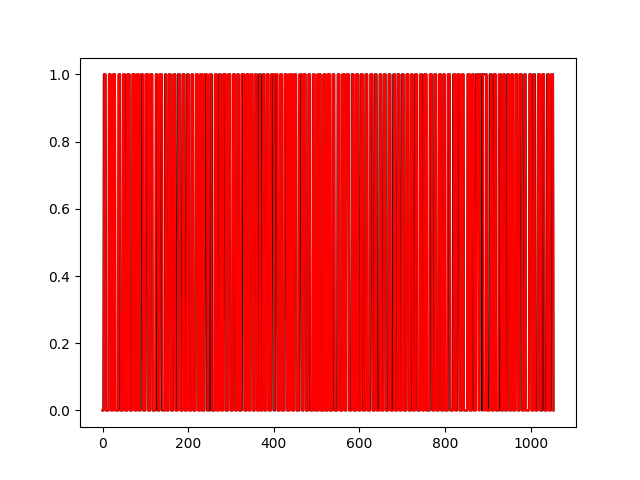

In [28]:
fig0 = plt.figure()
ax0 = fig0.add_subplot(111)
ax0.plot(fin_test_y, c='black')
ax0.plot(y_pred, c='red')
print(np.max(np.array(acc_list)))